In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

from quilt.data.examples import prophet as pdata
%matplotlib inline

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/karve/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


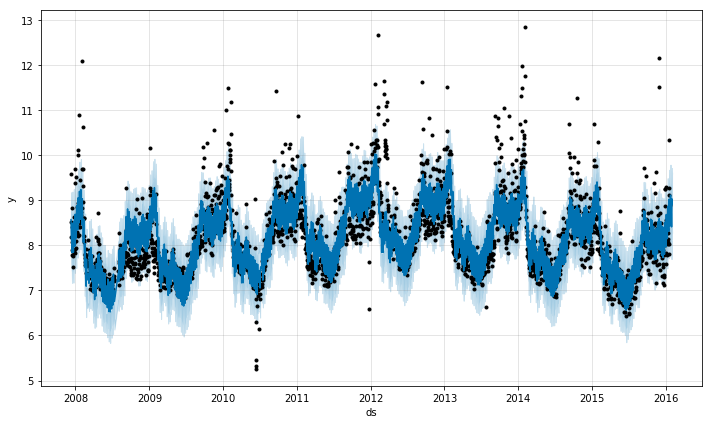

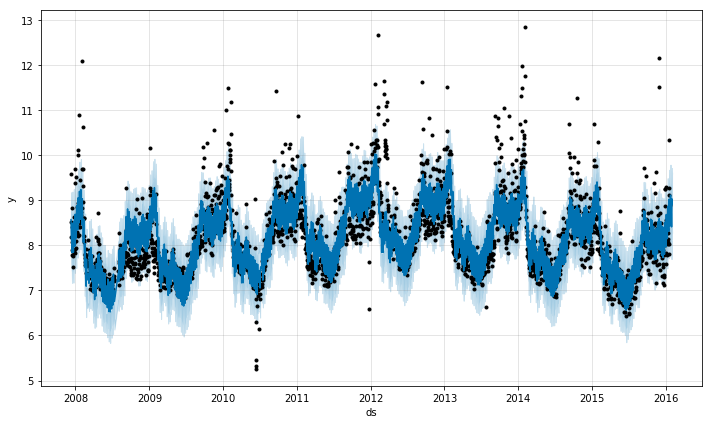

In [4]:
df = pdata.peyton_manning()
df['y'] = np.log(df['y'])
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
m.plot(fcst)

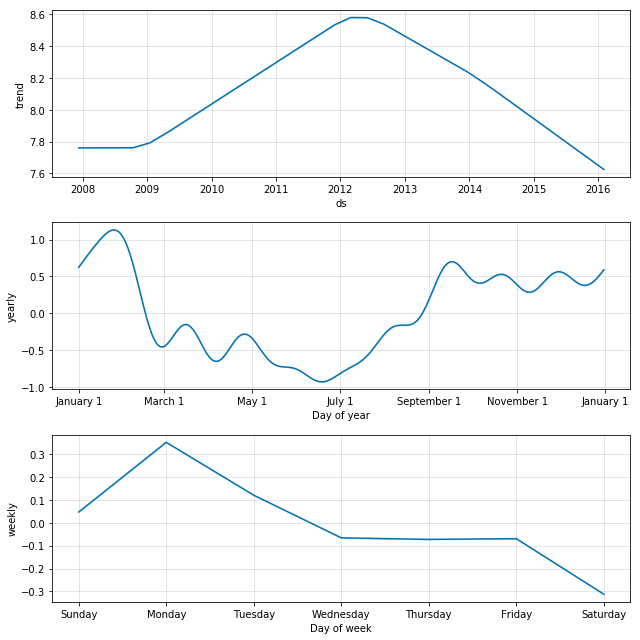

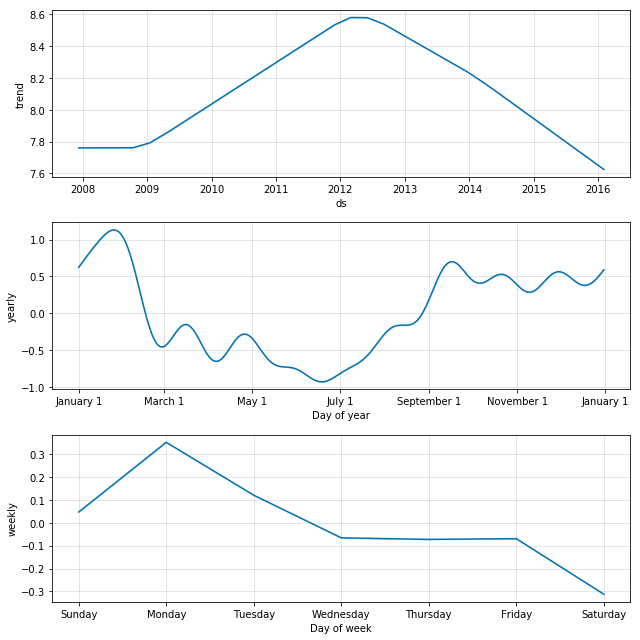

In [5]:
m.plot_components(fcst)

In [6]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = '730 days')
df_cv.head()

/Users/karve/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-21,9.387609,8.750497,10.057693,10.542574,2014-01-20
1,2014-01-22,9.213796,8.521365,9.899651,10.004283,2014-01-20
2,2014-01-23,9.207751,8.557176,9.878892,9.732818,2014-01-20
3,2014-01-24,9.221444,8.554296,9.894962,9.866460,2014-01-20
4,2014-01-25,9.029695,8.376213,9.727391,9.370927,2014-01-20


You can use Prophet to fit monthly data. However, the underlying model is continuous-time, which means that you can get strange results if you fit the model to monthly data and then ask for daily forecasts. Here we forecast US retail sales volume for the next 10 years:

In [ ]:
df = pdata.example_retail_sales()
m = Prophet().fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
m.plot(fcst);

In [ ]:
future = m.make_future_dataframe(periods=120, freq='M')
fcst = m.predict(future)
m.plot(fcst);